# Scraping Dataset

In [2]:
!pip install google-play-scraper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.8 MB/s eta 0:00:00


In [3]:
# Mengimpor pustaka google_play_scraper untuk mengakses ulasan dan informasi aplikasi dari Google Play Store.
from google_play_scraper import app, reviews, Sort, reviews_all

In [4]:
# Mengimpor pustaka google_play_scraper untuk mengakses ulasan dan informasi aplikasi dari Google Play Store.
from google_play_scraper import app, reviews_all, Sort

# Mengambil semua ulasan dari aplikasi dengan ID 'com.nudi.bkn.sapk' di Google Play Store.
# Proses scraping mungkin memerlukan beberapa saat tergantung pada jumlah ulasan yang ada.
scrapreview = reviews_all(
    'com.nudi.bkn.sapk',          # ID aplikasi
    lang='id',             # Bahasa ulasan (default: 'en')
    country='id',          # Negara (default: 'us')
    sort=Sort.MOST_RELEVANT, # Urutan ulasan (default: Sort.MOST_RELEVANT)
    count=1000            # Jumlah maksimum ulasan yang ingin diambil
)

In [5]:
# Menyimpan ulasan dalam file CSV
import csv

with open('ulasan_myasn.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Review'])  # Menulis header kolom
    for review in scrapreview:
        writer.writerow([review['content']])  # Menulis konten ulasan ke dalam file CSV

# Loading Dataset

In [6]:
import pandas as pd
app_reviews_df = pd.DataFrame(scrapreview)
app_reviews_df.shape
app_reviews_df.head()
app_reviews_df.to_csv('/content/drive/MyDrive/Kuliah/Semester 6/Penelitian Ilmiah/Analisis Sentimen/Sentimen Aplikasi/ulasan_myasn.csv', index=False) # upload ke gdrive

# Import Library

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import classification_report
import nltk

nltk.download('punkt')
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline
from wordcloud import WordCloud, STOPWORDS
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [8]:
df = pd.read_csv('/content/drive/MyDrive/Kuliah/Semester 6/Penelitian Ilmiah/Analisis Sentimen/Sentimen Aplikasi/ulasan_myasn.csv')
df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,23bc75e9-1a55-4744-99bf-88ab4d61d3cf,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Login dengan NIP dan password sudah benar tapi...,2,37,3.2.0,2025-02-14 06:30:39,NaN,NaN,3.2.0
1,8d90ad3a-297a-4fcf-98ab-d907f29bc55d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Ternyata melalui my ASN gk bs diharap. buat te...,1,31,3.2.0,2025-04-10 05:57:59,NaN,NaN,3.2.0
2,fd42423a-c500-4ecc-8713-cb51abc4d6b5,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,mau masuk tidak bisa karena credentials authen...,3,4,3.1.8,2025-04-11 03:16:27,NaN,NaN,3.1.8
3,cb213cbb-3f8d-4e70-ba52-3a3954804a3f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Mohon solusinya utk pihak pengembang, ternyata...",3,5,3.2.0,2025-04-11 11:11:15,NaN,NaN,3.2.0
4,848c531a-74dd-45d1-81d0-a7115179925d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Tidak bisa mengupdate riwayat keluarga. Sudah ...,1,7,3.2.0,2025-03-17 02:38:18,NaN,NaN,3.2.0
...,...,...,...,...,...,...,...,...,...,...,...
7085,e9c88588-dbae-4589-a259-f4c186415ca0,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,💩💩💩💩,1,0,NaN,2021-09-14 08:16:44,NaN,NaN,NaN
7086,01cc3519-0a10-4332-bb60-24b2991a0b2f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,😟,1,0,NaN,2019-10-07 15:16:53,NaN,NaN,NaN
7087,467486e2-5bb4-4d82-89af-38020c80cb11,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,😶,1,0,NaN,2021-09-22 23:08:49,NaN,NaN,NaN
7088,e6744483-b384-442e-b994-d46b8bc24517,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,👎👎👎👎👎,1,0,NaN,2019-12-31 04:07:01,NaN,NaN,NaN


# 1. Cleaning Data

In [9]:
df = df[['content', 'score']]
df

,content,score
0,Login dengan NIP dan password sudah benar tapi...,2
1,Ternyata melalui my ASN gk bs diharap. buat te...,1
2,mau masuk tidak bisa karena credentials authen...,3
3,"Mohon solusinya utk pihak pengembang, ternyata...",3
4,Tidak bisa mengupdate riwayat keluarga. Sudah ...,1
...,...,...
7085,💩💩💩💩,1
7086,😟,1
7087,😶,1
7088,👎👎👎👎👎,1


In [10]:
df.shape

(7090, 2)

In [11]:
df = df.drop_duplicates(subset='content')
df

,content,score
0,Login dengan NIP dan password sudah benar tapi...,2
1,Ternyata melalui my ASN gk bs diharap. buat te...,1
2,mau masuk tidak bisa karena credentials authen...,3
3,"Mohon solusinya utk pihak pengembang, ternyata...",3
4,Tidak bisa mengupdate riwayat keluarga. Sudah ...,1
...,...,...
7085,💩💩💩💩,1
7086,😟,1
7087,😶,1
7088,👎👎👎👎👎,1


In [12]:
df = df.dropna()

In [13]:
df.shape

(5345, 2)

In [14]:
def clean_myasn_data(text):
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)

    text = re.sub(r'[^A-Za-z0-9 ]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()

    return text

df['content'] = df['content'].apply(clean_myasn_data)

# 2. Preprocessing

In [15]:
score = df['score']

In [16]:
df['content'] = df['content'].str.lower()

In [17]:
df.head()

,content,score
0,login dengan nip dan password sudah benar tapi...,2
1,ternyata melalui my asn gk bs diharap buat tem...,1
2,mau masuk tidak bisa karena credentials authen...,3
3,mohon solusinya utk pihak pengembang ternyata ...,3
4,tidak bisa mengupdate riwayat keluarga sudah b...,1


In [18]:
def filter_tokens_by_length(dataframe, column, min_words, max_words):
    words_count = dataframe[column].astype(str).apply(lambda x: len(x.split()))
    mask = (words_count >= min_words) & (words_count <= max_words)
    filtered_df = dataframe[mask]
    return filtered_df

min_words = 3
max_words = 50

df = filter_tokens_by_length(df, 'content', min_words, max_words)

In [19]:
# Normalisasi
norm = {
" yg ": " yang ",
" gak ": " tidak ",
" ga ": " tidak ",
" ok ": " oke ",
" bkn ": " bukan ",
" tdk ": " tidak ",
" sdh ": " sudah ",
" aja ": " saja ",
" tp ": " tapi ",
" apk ": " aplikasi ",
" hp ": " handphone ",
" asn ": " Aparatur Sipil Negara ",
" nip ": " Nomor Induk Pegawai ",
" pns ": " Pegawai Negeri Sipil "

}

def normalisasi(str_text):
    for i in norm:
        str_text = str_text.replace(i, norm[i])
    return str_text

df['content'] = df['content'].apply(lambda x: normalisasi(x))

In [20]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.2 MB/s eta 0:00:00


In [21]:
# Stopwords
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
stop_words.extend(more_stop_words)

new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
    str_text = stop_words_remover_new.remove(str_text)
    return str_text

df['content'] = df['content'].apply(lambda x: stopword(x))

In [22]:
# Tokenize
tokenized = df['content'].apply(lambda x: x.split())
tokenized

,content
0,"[login, Nomor, Induk, Pegawai, password, benar..."
3,"[mohon, solusinya, utk, pihak, pengembang, ter..."
4,"[bisa, mengupdate, riwayat, keluarga, berhasil..."
5,"[diperbaiki, update, aplikasi, saat, mau, log,..."
6,"[egak, usah, buat, aplikasi, kalo, sempurna, s..."
...,...
6558,"[data, hrs, valid]"
6559,"[aplikasi, sangat, baik]"
7003,"[the, best, application]"
7004,"[kiki, vr, kiki, vr]"


In [23]:
# Stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    do = []
    for w in text_cleaning:
        dt = stemmer.stem(w)
        do.append(dt)
    d_clean = []
    d_clean = " ".join(do)
    print(d_clean)
    return d_clean

tokenized = tokenized.apply(stemming)
tokenized.to_csv('/content/drive/MyDrive/Kuliah/Semester 6/Penelitian Ilmiah/Analisis Sentimen/Sentimen Aplikasi/Preprocessingmyasn.csv', index=False)

login nomor induk pegawai password benar terang malah nomor induk pegawai ada data terus login lewat crome malah muncul data orang ini gimana kok bisa bukak data lewat aplikasi myasn bkn
mohon solusi utk pihak kembang nyata login my aparatur sipil negara digital alas email tidak daftar padahal semua email aktif mohon segera tanggap krn sangat urgen utk para guna terimakasih banyak salam sukses selalu
bisa mengupdate riwayat keluarga hasil menginput pada riwayat aju ada data
baik update aplikasi saat mau log in muncul notif nomor induk pegawai ada basis data di update tak ad masalah
egak usah buat aplikasi kalo sempurna bulan login lalu aplikasi login lalu chrome bisa ayo jangan terlalu lama updatenya kena hajad hidup orang banyak bro
kocak login lewat web masuk update profil gilir lewat app malah nomor induk pegawai tidak ada database anggar development bukan main hasil app nya main2 wkwkwk
hendak ikut atur terap perintah harus update data lewat aplikasi myasn selalu kendala server bua

In [ ]:
tokenized = pd.read_csv('/content/drive/MyDrive/Kuliah/Semester 6/Penelitian Ilmiah/Analisis Sentimen/Sentimen Aplikasi/Preprocessingmyasn.csv')

In [24]:
tokenized

,content
0,login nomor induk pegawai password benar teran...
3,mohon solusi utk pihak kembang nyata login my ...
4,bisa mengupdate riwayat keluarga hasil menginp...
5,baik update aplikasi saat mau log in muncul no...
6,egak usah buat aplikasi kalo sempurna bulan lo...
...,...
6558,data hrs valid
6559,aplikasi sangat baik
7003,the best application
7004,kiki vr kiki vr


In [25]:
score

,score
0,2
1,1
2,3
3,3
4,1
...,...
7085,1
7086,1
7087,1
7088,1


In [26]:
# Menggabungkan kedua DataFrame berdasarkan index
score.drop(columns=['Unnamed=0'], inplace=True)
df = pd.concat([tokenized, score], axis=1)
df.head()

,content,score
0,login nomor induk pegawai password benar teran...,2
3,mohon solusi utk pihak kembang nyata login my ...,3
4,bisa mengupdate riwayat keluarga hasil menginp...,1
5,baik update aplikasi saat mau log in muncul no...,1
6,egak usah buat aplikasi kalo sempurna bulan lo...,1


In [27]:
df.shape

(5345, 2)

In [28]:
df.isna().sum()

,0
content,1068
score,0


In [29]:
df.dropna(inplace=True)

In [30]:
df.isna().sum()

,0
content,0
score,0


In [31]:
df.shape

(4277, 2)

# 3. Labeling

In [38]:
def label_sentiment(score):
    if score <= 2:
        return 'negatif'
    # elif score == 3:
    #     return 'netral'
    else:
        return 'positif'

df['sentimen'] = df['score'].apply(label_sentiment)

In [39]:
df.head()

,content,score,sentimen
0,login nomor induk pegawai password benar teran...,2,negatif
3,mohon solusi utk pihak kembang nyata login my ...,3,positif
4,bisa mengupdate riwayat keluarga hasil menginp...,1,negatif
5,baik update aplikasi saat mau log in muncul no...,1,negatif
6,egak usah buat aplikasi kalo sempurna bulan lo...,1,negatif


In [40]:
sentimen_counts = df.sentimen.value_counts()
sentimen_counts

,count
sentimen,
negatif,2421
positif,1856


# 4. Visualization

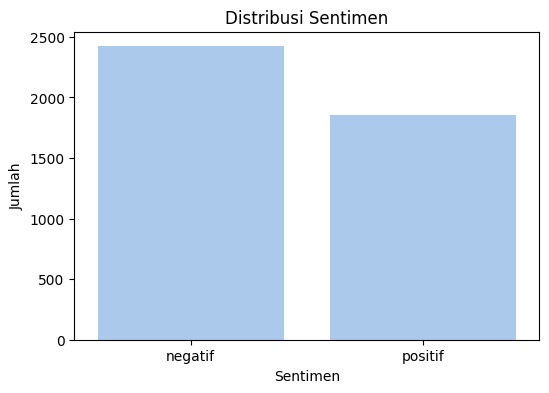

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Visualisasi
sns.set_palette("pastel")
plt.figure(figsize=(6, 4))
sns.countplot(x='sentimen', data=df)
plt.title('Distribusi Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.show()

In [42]:
data_negatif = df[df['sentimen'] == 'negatif']
data_positif = df[df['sentimen'] == 'positif']

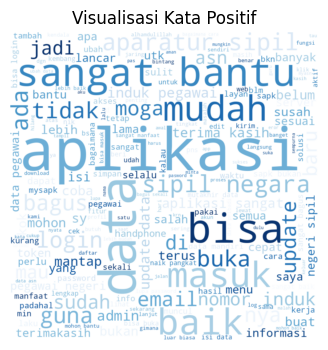

In [43]:
all_text_s1 = ' '.join(str(word) for word in data_positif["content"])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode="RGBA", background_color='white').generate(all_text_s1)
plt.figure(figsize=(6, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Visualisasi Kata Positif")
plt.margins(x=0, y=0)
plt.show()

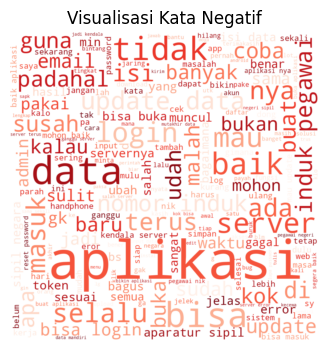

In [44]:
all_text_s0 = ' '.join(str(word) for word in data_negatif["content"])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(6, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Visualisasi Kata Negatif")
plt.margins(x=0, y=0)
plt.show()

# 5. Splitting Data

In [45]:
X=df.content
y=df.sentimen

In [46]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [47]:
print('Banyak data x_train :',len(x_train))
print('Banyak data x_test  :',len(x_test))
print('Banyak data y_train :',len(y_train))
print('Banyak data y_test  :',len(y_test))

Banyak data x_train : 3421
Banyak data x_test  : 856
Banyak data y_train : 3421
Banyak data y_test  : 856


# 6. Training Data (SVM, Naive Bayes, Random Forest)

In [48]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer, HashingVectorizer
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

cvec=CountVectorizer()
tvec=TfidfVectorizer()
hvec=HashingVectorizer()

In [49]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

clf1 = SVC(kernel="linear")
clf2 = MultinomialNB()
clf3 = RandomForestClassifier()

In [50]:
from sklearn.pipeline import Pipeline

model1 = Pipeline([('vectorizer',tvec)
                 ,('classifier',clf1)])
model2 = Pipeline([('vectorizer',tvec)
                 ,('classifier',clf2)])
model3 = Pipeline([('vectorizer',tvec)
                 ,('classifier',clf3)])

In [51]:
# Now fit the model
model1.fit(x_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', SVC(kernel='linear'))])

In [52]:
hasil1 = model1.predict(x_test)  # Now predict with the cleaned x_test

In [53]:
matrix = classification_report(y_test,hasil1)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

     negatif       0.75      0.86      0.80       494
     positif       0.76      0.61      0.68       362

    accuracy                           0.75       856
   macro avg       0.75      0.73      0.74       856
weighted avg       0.75      0.75      0.75       856



In [54]:
model2.fit(x_train,y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', MultinomialNB())])

In [55]:
hasil2=model2.predict(x_test)

In [56]:
matrix = classification_report(y_test,hasil2)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

     negatif       0.72      0.91      0.80       494
     positif       0.81      0.51      0.62       362

    accuracy                           0.74       856
   macro avg       0.76      0.71      0.71       856
weighted avg       0.75      0.74      0.73       856



In [57]:
model3.fit(x_train,y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

In [58]:
hasil3=model3.predict(x_test)

In [59]:
matrix = classification_report(y_test,hasil3)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

     negatif       0.76      0.81      0.78       494
     positif       0.71      0.65      0.68       362

    accuracy                           0.74       856
   macro avg       0.74      0.73      0.73       856
weighted avg       0.74      0.74      0.74       856



In [60]:
hasilSVC = accuracy_score(hasil1, y_test)
precision1 = precision_score(y_test, hasil1, average='weighted')
recall1 = recall_score(y_test, hasil1, average='weighted')
f1_1 = f1_score(y_test, hasil1, average='weighted')

hasilMultinomialNB = accuracy_score(hasil2, y_test)
precision2 = precision_score(y_test, hasil2, average='weighted')
recall2 = recall_score(y_test, hasil2, average='weighted')
f1_2 = f1_score(y_test, hasil2, average='weighted')

hasilRandomForestClassifier = accuracy_score(hasil3, y_test)
precision3 = precision_score(y_test, hasil3, average='weighted')
recall3 = recall_score(y_test, hasil3, average='weighted')
f1_3 = f1_score(y_test, hasil3, average='weighted')

In [62]:
model = {'Model':['SVC Classifier',
                  'Multinomial Naive Bayes',
                  'Random Forest Classifier',
                 ],
         'AccuracyScore':[hasilSVC, hasilMultinomialNB, hasilRandomForestClassifier],
         'Precision':[precision1, precision2, precision3],
         'Recall':[recall1, recall2, recall3],
         'F1-Score':[f1_1, f1_2, f1_3]
         }
model_df = pd.DataFrame(model)
model_df

,Model,AccuracyScore,Precision,Recall,F1-Score
0,SVC Classifier,0.753505,0.754016,0.753505,0.748567
1,Multinomial Naive Bayes,0.740654,0.754815,0.740654,0.726690
2,Random Forest Classifier,0.740654,0.738947,0.740654,0.738870


# 7. Testing

In [63]:
def classify_text(input_text):
    models = [
        ('SVCClassifier', model_svc),
        ('MultinomialNB', model_multinomialNaiveBayes),
        ('RandomForestClassifier', model_randomForest)
    ]

    results = {}

    for name, model in models:
        prediction = model.predict([input_text])
        results[name] = prediction[0]

    return results

In [64]:
model_svc = model1.fit(x_train, y_train)
model_multinomialNaiveBayes = model2.fit(x_train, y_train)
model_randomForest = model3.fit(x_train, y_train)

In [65]:
input_text = input("Masukkan teks yang ingin diklasifikasikan: ")

results = classify_text(input_text)

print("Input kata :", input_text)

print("\nHasil Klasifikasi:")
for model, prediction in results.items():
    print(f"{model}: {prediction}")

Masukkan teks yang ingin diklasifikasikan: aplikasinya terasa cepat dan responsif
Input kata : aplikasinya terasa cepat dan responsif

Hasil Klasifikasi:
SVCClassifier: positif
MultinomialNB: positif
RandomForestClassifier: positif


# SAVE MODEL UNTUK TESTING

In [66]:
# DEFINISIKAN PATH PENYIMPANAN
save_path = '/content/drive/MyDrive/Kuliah/Semester 6/Penelitian Ilmiah/Analisis Sentimen/Sentimen Aplikasi'

In [67]:
import joblib
import os

# Pastikan folder tujuan ada
os.makedirs(save_path, exist_ok=True)

# Simpan model
joblib.dump(model_svc, os.path.join(save_path, 'model_svc.pkl'))
joblib.dump(model_multinomialNaiveBayes, os.path.join(save_path, 'model_multinomialNaiveBayes.pkl'))
joblib.dump(model_randomForest, os.path.join(save_path, 'model_randomForest.pkl'))

# Simpan vectorizer
# Mengambil vectorizer dari salah satu model, misalnya model1
vectorizer = model1.named_steps['vectorizer']
joblib.dump(vectorizer, os.path.join(save_path, 'vectorizer.pkl'))

print("Model dan vectorizer berhasil disimpan di Google Drive!")

Model dan vectorizer berhasil disimpan di Google Drive!


# LOAD MODEL UNTUK TESTING

In [68]:
import joblib  # Import the joblib library
import os

# DEFINISIKAN PATH PENYIMPANAN
save_path = '/content/drive/MyDrive/Kuliah/Semester 6/Penelitian Ilmiah/Analisis Sentimen/Sentimen Aplikasi'

# Load kembali dari Google Drive
model_svc = joblib.load(os.path.join(save_path, 'model_svc.pkl'))
model_multinomialNaiveBayes = joblib.load(os.path.join(save_path, 'model_multinomialNaiveBayes.pkl'))
model_randomForest = joblib.load(os.path.join(save_path, 'model_randomForest.pkl'))

vectorizer = joblib.load(os.path.join(save_path, 'vectorizer.pkl'))

# TESTING

In [69]:
def classify_text(input_text):
    # The input text should be transformed within the pipeline, not beforehand
    # input_vector = vectorizer.transform([input_text])  <-- REMOVE THIS LINE
    models = [
        ('SVCClassifier', model_svc),
        ('MultinomialNB', model_multinomialNaiveBayes),
        ('RandomForestClassifier', model_randomForest)
    ]

    results = {}
    for name, model in models:
        # The model's pipeline will handle the transformation
        prediction = model.predict([input_text])
        results[name] = prediction[0]

    return results

# Uji input
input_text = input("Masukkan teks yang ingin diklasifikasikan: ")
hasil = classify_text(input_text)

print("\nHasil Klasifikasi:")
print(f"Teks: {input_text}")
for model_name, pred in hasil.items():
    print(f"{model_name}: {pred}")

Masukkan teks yang ingin diklasifikasikan: aplikasinya sangat jelek dan tidak responsif

Hasil Klasifikasi:
Teks: aplikasinya sangat jelek dan tidak responsif
SVCClassifier: negatif
MultinomialNB: negatif
RandomForestClassifier: negatif
